Import Libraries

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


Create Train Data

In [2]:
train_samples = []
train_labels = []

In [3]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(950):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

Create Keras Model

In [6]:
model = Sequential([
    Input(shape=(1,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,818 (11.01 KB)

 Trainable params: 2,818 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
180/180 - 5s - 27ms/step - accuracy: 0.8867 - loss: 0.3252 - val_accuracy: 0.9400 - val_loss: 0.2349
Epoch 2/30
180/180 - 0s - 3ms/step - accuracy: 0.9267 - loss: 0.2597 - val_accuracy: 0.9650 - val_loss: 0.1848
Epoch 3/30
180/180 - 0s - 3ms/step - accuracy: 0.9322 - loss: 0.2503 - val_accuracy: 0.9000 - val_loss: 0.2595
Epoch 4/30
180/180 - 0s - 3ms/step - accuracy: 0.9239 - loss: 0.2598 - val_accuracy: 0.9550 - val_loss: 0.1638
Epoch 5/30
180/180 - 0s - 3ms/step - accuracy: 0.9289 - loss: 0.2550 - val_accuracy: 0.9600 - val_loss: 0.1711
Epoch 6/30
180/180 - 1s - 4ms/step - accuracy: 0.9261 - loss: 0.2477 - val_accuracy: 0.9250 - val_loss: 0.2286
Epoch 7/30
180/180 - 1s - 3ms/step - accuracy: 0.9289 - loss: 0.2456 - val_accuracy: 0.9550 - val_loss: 0.1610
Epoch 8/30
180/180 - 0s - 3ms/step - accuracy: 0.9322 - loss: 0.2385 - val_accuracy: 0.9700 - val_loss: 0.1553
Epoch 9/30
180/180 - 0s - 3ms/step - accuracy: 0.9200 - loss: 0.2547 - val_accuracy: 0.9550 - val_loss: 0.1711


Create Dataset for Prediction

In [9]:
test_samples = []
test_labels = []

In [10]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [11]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
print(test_labels)
print(test_samples)

[1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 0 1 1]
[100  41  81  72  48  13  91  27  43  36  21  96  88  88  55  72  24  45
  21  22  83  40  99  82  53  75  84  16  87  75  79  18  54  18  45  41
 

Create Model and Train

In [12]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [14]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

Confusion Matrix

In [15]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  tresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > tresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


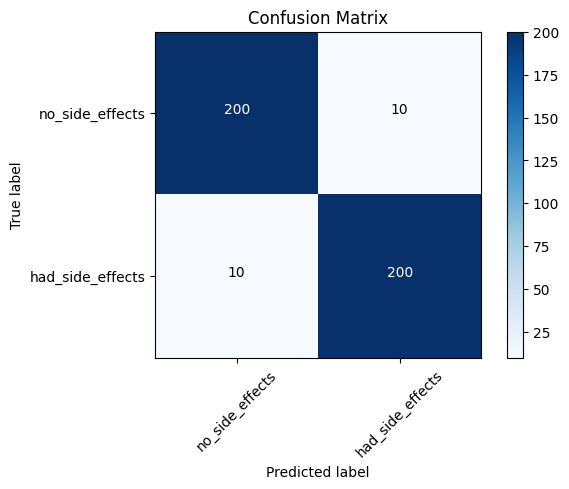

In [17]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Save Model

In [18]:
import os.path
if os.path.isfile('models/medical_trial_model.keras') is False:
  model.save('models/medical_trial_model.keras')